Get the required packages in place.

In [1]:
using Flux;
using Flux.Data.MNIST;
using Flux: onehotbatch, onecold, crossentropy, throttle
using Statistics
using Base.Iterators: repeated, partition
using Images

Get the images and labels from MNIST dataset.

In [2]:
images = MNIST.images();
labels = MNIST.labels();

In [3]:
function rewrite(r)  # rewrite a range r of images

    X = hcat([vec(Float64.(images[i])) for i in r]...)
    Y = onehotbatch(labels[r], 0:9)
    
    return (X, Y)
end

rewrite (generic function with 1 method)

Prepare the data for training using first 5000 images of the training dataset (to keep the training time limited).

In [4]:
N = 5000
X, Y = rewrite(1:N)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[false true … false false; false false … true false; … ; false false … false false; false false … false false])

Define the model as dense model with 784 input (the same as number of pixels in each image). The hidden layer of 255 neurons and and output layer of 10 neurons (one for each digit).

In [4]:
n = length(vec(images[1]))

model = 
  Chain(
      Dense(n, 255, relu), 
      Dense(255, 10, relu),#   Dense(10, 10),
      softmax
  )

Chain(Dense(784, 255, NNlib.relu), Dense(255, 10, NNlib.relu), NNlib.softmax)

In [6]:
prediction(i) = findmax(model(Float64.(vec(images[i]))))[2] # returns (max_value, index)
function accuracy()
    which_correct = [prediction(i) == (labels[i]) + 1 for i in N+1:N+1000];
    return count(which_correct) / 1000
end

accuracy (generic function with 1 method)

Accuracy is calculated by providing image 5001 - 6000 as input and comparing the predicted value against the actual provided in dataset.

In [7]:
loss(x, y) = Flux.crossentropy(model(x), y)
opt = ADAM(params(model))
l = loss(X, Y)
evalcb = throttle(() -> @show(accuracy()), 10)

Flux.Tracker.back!(l)

In [8]:
dataset = Base.Iterators.repeated((X, Y), 100)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}}(Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}(([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[false true … false false; false false … true false; … ; false false … false false; false false … false false])), 100)

In [9]:
@time Flux.train!(loss, dataset, opt, cb = evalcb)

accuracy() = 0.306
accuracy() = 0.731
accuracy() = 0.763
accuracy() = 0.827
accuracy() = 0.846
accuracy() = 0.852
accuracy() = 0.852
 80.072117 seconds (11.22 M allocations: 8.922 GiB, 17.09% gc time)


Following function takes input as RGB image of the number created as explained in the report. It returns the output as the number by inferencing based on the model created above. The number can be any single digit or multiple digit number.

In [12]:
function read_image(num_img)
    num_gs = Gray.(num_img)
    imgs = [num_gs[1:28, (i-1)*28 + 1: i*28] for i in 1:(Int64((size(num_gs)[2])/28))]
    number = 0
    i = 0
    for j in reverse(1:length(imgs))
        mynum = findmax(model(Float64.(vec(imgs[j]))))[2]  .-1
        number = number + (10^i)*mynum
        i += 1
    end
    return number
end


read_image (generic function with 1 method)

Load all images (only with jpg extension) to my_images array.

,,,,,,

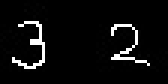
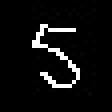
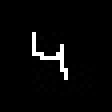
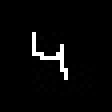
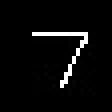
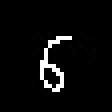
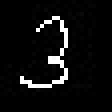

In [22]:
using Images
files = readdir("data/")
my_images = [load("data/"*file) for file in files if(occursin(".jpg",file))]


Inference all images in the array and time each inferecing using @time.

In [21]:
for i in 1:length(my_images)
@time println(read_image(my_images[i]))
end

52
  0.000564 seconds (274 allocations: 33.016 KiB)
6
  0.000079 seconds (153 allocations: 16.688 KiB)
4
  0.000090 seconds (153 allocations: 16.688 KiB)
4
  0.000090 seconds (154 allocations: 17.078 KiB)
7
  0.000070 seconds (153 allocations: 16.688 KiB)
6
  0.000066 seconds (154 allocations: 17.219 KiB)
3
  0.000073 seconds (154 allocations: 17.078 KiB)
